# **06-Análisis de resultados**

In [1]:
%cd ..

/Users/belensantamaria/Documentos/section_identification


In [2]:
import pandas as pd
import json
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def plot_errors(file_path):
    
    with open(file_path) as f:
        data = json.load(f)
    
    df = pd.DataFrame([d["Statistics"] for d in data["Scores per file"].values()])

    fig, axes = plt.subplots(2, 4, figsize=(16,8))

    # Cantidad de additions
    a = Counter([len(list(a)) for a in df["additions"]])
    g = sns.barplot(x=list(a.keys()), y=list(a.values()), ax=axes[0,0])
    g.set_title("Cantidad de additions por nota")
    g.grid(axis="y")
    
    del a[0]
    print(f"Adiciones: {sum(a.values())}")

    c = Counter()
    [c.update(list(a)) for a in df["additions"]]
    g = sns.barplot(x=list(c.keys()), y=list(c.values()), ax=axes[1,0])
    g.set_title("Cantidad de additions por sección")
    g.set_xticklabels(g.get_xticklabels(), rotation=30, horizontalalignment="right", size = 7);
    g.grid(axis="y")

    # Cantidad de deletions
    a = Counter([len(list(a)) for a in df["deletions"]])
    g = sns.barplot(x=list(a.keys()), y=list(a.values()), ax=axes[0,1])
    g.set_title("Cantidad de deletions por nota")
    g.grid(axis="y")
    
    del a[0]
    print(f"Eliminaciones: {sum(a.values())}")

    c = Counter()
    [c.update(list(a)) for a in df["deletions"]]
    g = sns.barplot(x=list(c.keys()), y=list(c.values()), ax=axes[1,1])
    g.set_title("Cantidad de deletions por sección")
    g.set_xticklabels(g.get_xticklabels(), rotation=30, horizontalalignment="right", size = 7);
    g.grid(axis="y")

    # Cantidad de transposiciones
    boundaries = [[a["boundary"] for a in b] for b in df["transpositions"]]
    a = Counter([len(a) for a in boundaries])
    g = sns.barplot(x=list(a.keys()), y=list(a.values()), ax=axes[0,2])
    g.set_title("Cantidad de transpositions por nota")
    g.grid(axis="y")
    
    del a[0]
    print(f"Transposiciones: {sum(a.values())}")

    c = Counter()
    [c.update(a) for a in boundaries]
    g = sns.barplot(x=list(c.keys()), y=list(c.values()), ax=axes[1,2])
    g.set_title("Cantidad de transpositions por sección")
    g.set_xticklabels(g.get_xticklabels(), rotation=30, horizontalalignment="right", size = 7);
    g.grid(axis="y")

    # Cantidad de substitutions
    a = Counter([len(list(a)) for a in df["substitutions"]])
    g = sns.barplot(x=list(a.keys()), y=list(a.values()), ax=axes[0,3])
    g.set_title("Cantidad de sustituciones por nota")
    g.grid(axis="y")
    
    del a[0]
    print(f"sustituciones: {sum(a.values())}")

    c = Counter()
    [[c.update([tuple(b)]) for b in a] for a in df["substitutions"]]
    g = sns.barplot(x=[str(a) for a in c.keys()], y=list(c.values()), ax=axes[1,3])
    g.set_title("Cantidad de sustituciones por sección")
    g.set_xticklabels(g.get_xticklabels(), rotation=30, horizontalalignment="right", size = 7);
    g.grid(axis="y")

Adiciones: 122
Eliminaciones: 111
Transposiciones: 6
sustituciones: 127


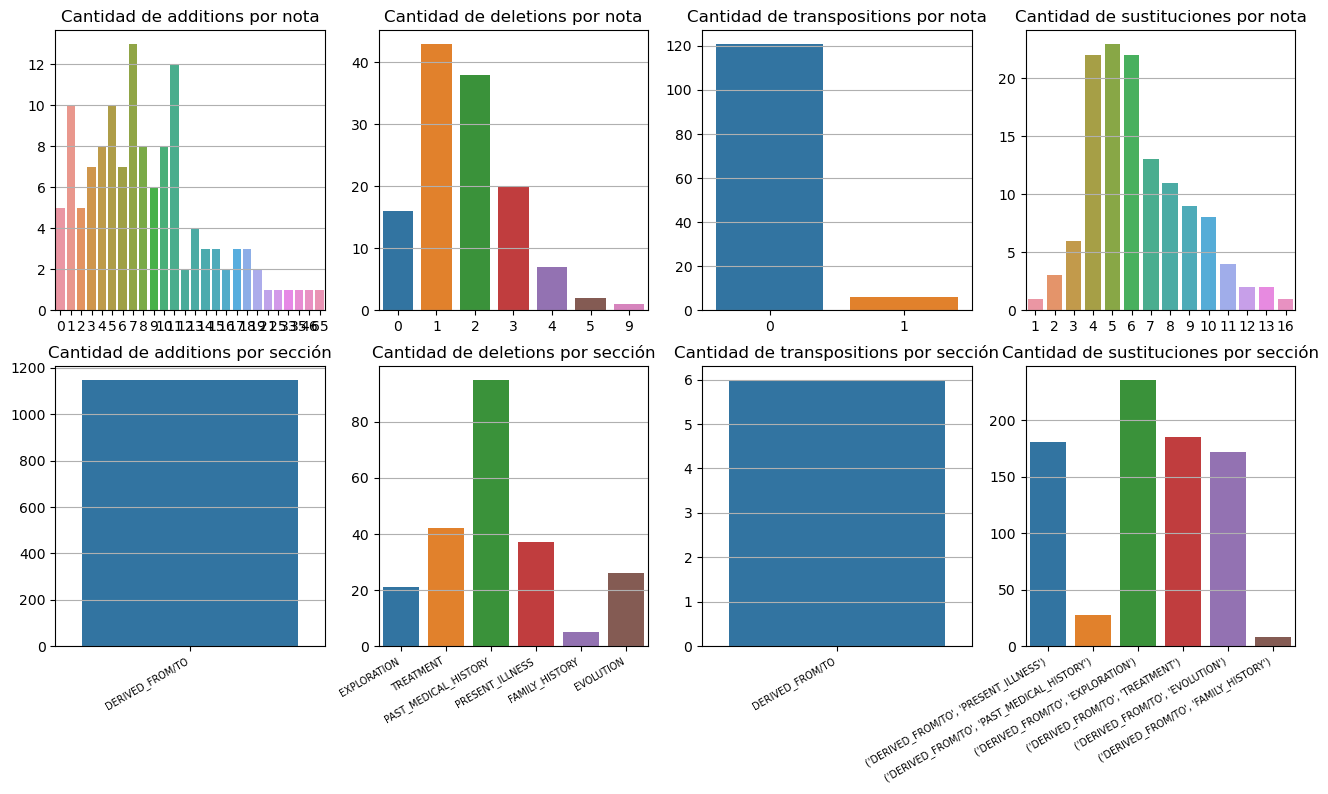

In [4]:
file_path = "data/results/results_rule_classifier.json"
plot_errors(file_path)

Adiciones: 69
Eliminaciones: 127
Transposiciones: 82
sustituciones: 58


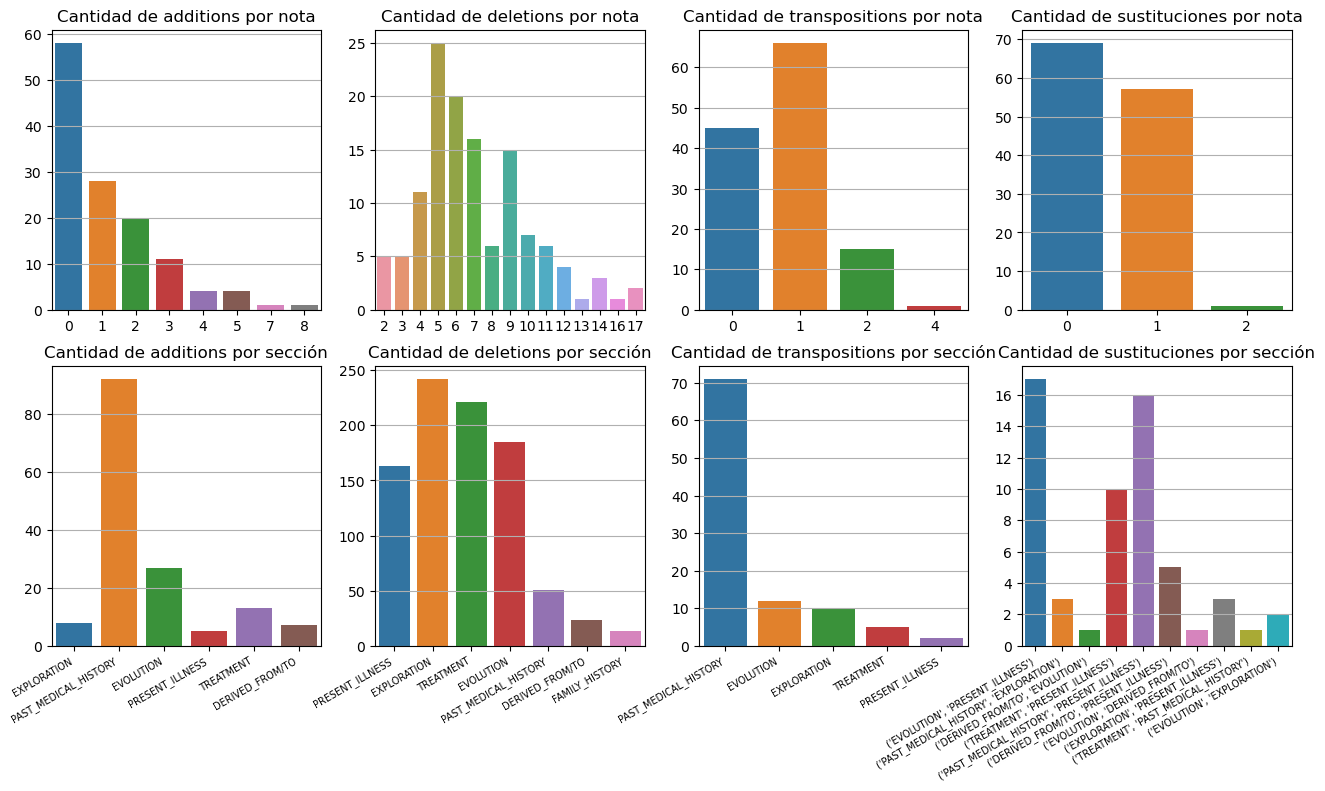

In [5]:
file_path = "data/results/results_spacy_spancat.json"
plot_errors(file_path)

Adiciones: 87
Eliminaciones: 116
Transposiciones: 64
sustituciones: 50


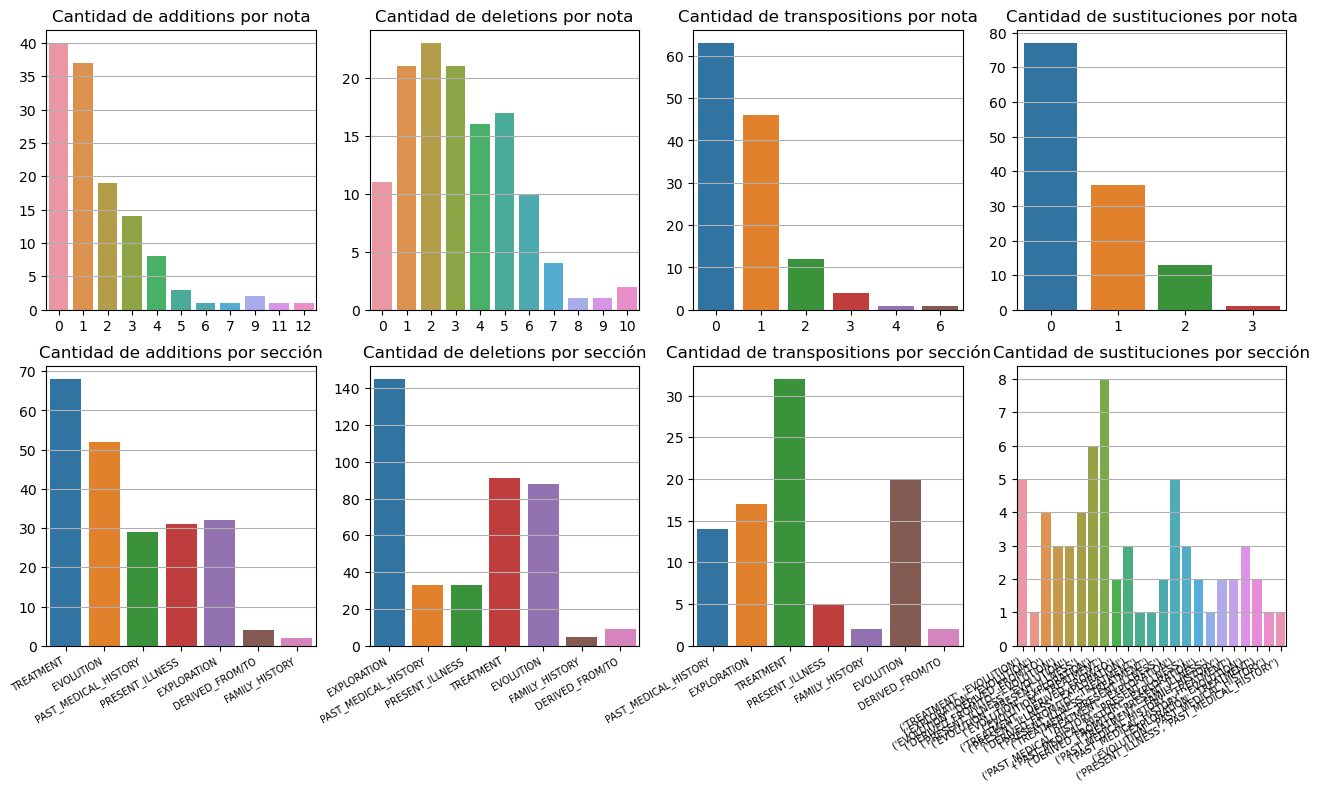

In [6]:
file_path = "data/results/results_spacy_ner.json"
plot_errors(file_path)

Adiciones: 48
Eliminaciones: 115
Transposiciones: 68
sustituciones: 21


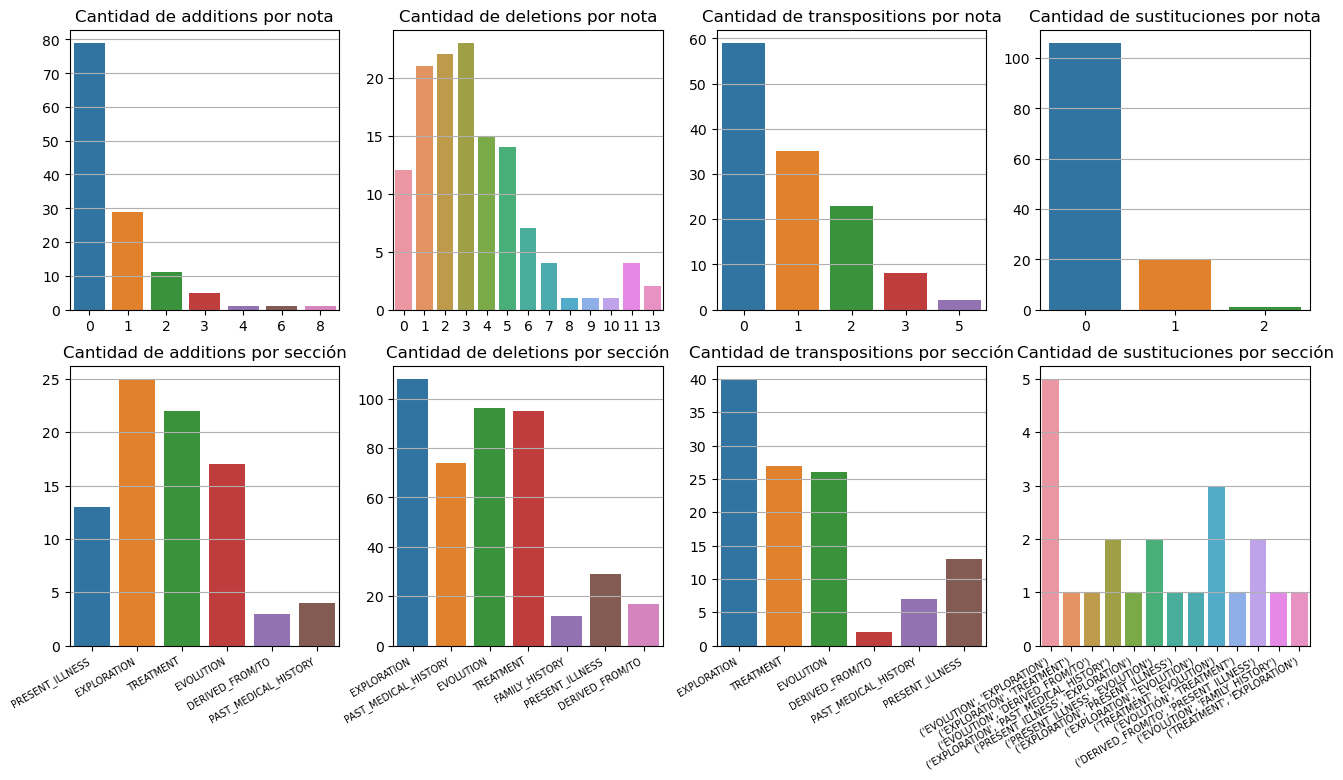

In [7]:
file_path = "data/results/results_ner_bert.json"
plot_errors(file_path)